In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Aprendizaje automatico y ataques informaticos**

### **Librerias a utilizar**


In [ ]:
# en caso de que no ande el notebook usar esta linea decomando
!pip install keras-tuner

In [ ]:
#librerias para el analisis de dato:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#librerias para pre-procesamiento de los datos en caso de ser necesario:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

#se usaran modelos de tipo clasificacion que soportan multiclase ya que se elegiran mas de tres posibilidades
#modelos:
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.layers import Input, Dense, Dropout
#import keras_tuner
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

#librerias adicionales:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score
import math as m
import time as t
import scipy.stats as stats


### **Dataset a utilizar**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KDDCup99.csv')

<p>el dataset KDD Cup 1999 (<a href = 'https://kdd.ics.uci.edu/databases/kddcup99/task.html'>https://kdd.ics.uci.edu/databases/kddcup99/task.html</a>) es un conjunto de datos ampliamente utilizado en el campo de la seguridad informática y la detección de intrusiones en redes. Aquí tienes información relevante sobre este dataset:</p>
<ul>
    <li><b>Origen y Propósito</b>: Fue creado para la competición KDD Cup 1999, organizada por DARPA (Defense Advanced Research Projects Agency) en colaboración con MIT Lincoln Laboratory. El objetivo era desarrollar métodos efectivos para detectar intrusiones en redes de computadoras.</li>
    <li><b>Composición del Dataset</b>: Contiene datos simulados que representan actividades de red normales y anómalas. Incluye un conjunto de características (atributos) que describen las conexiones de red, como tipo de protocolo, duración de la conexión, número de bytes transferidos, entre otros.</li>
    <li><b>Tipos de Conexiones</b>:El dataset clasifica las conexiones en varias categorías, incluyendo "normal" y diferentes tipos de intrusiones, como "DoS" (Denial of Service), "Probe" (sondeos de red), "R2L" (ataques de acceso no autorizado desde una máquina externa), y "U2R" (escalada de privilegios local).
    </li>
    

</ul>

In [ ]:
# informacion del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

<h3> contenido de las caracteristicas:</h3>

<ol>
    <li><b>duration</b>: Duración de la conexión en segundos.</li>
    <li><b>protocol_type</b>: Tipo del protocolo de red, como TCP, UDP, etc.</li>
    <li><b>service</b>: Servicio de red en el que se realiza la conexión, como http, ftp, etc.</li>
    <li><b>flag</b>: Estado de la conexión, por ejemplo, SF (established), S0 (intentos de escaneo), REJ (rechazado), etc.</li>
    <li><b>src_bytes</b>: Número de bytes transferidos desde el origen al destino.</li>
    <li><b>dst_bytes</b>: Número de bytes transferidos desde el destino al origen.</li>
    <li><b>land</b>: Indicador si la conexión es de tipo "land attack".</li>
    <li><b>wrong_fragment</b>: Número de fragmentos incorrectos.</li>
    <li><b>urgent</b>: Número de paquetes urgentes.</li>
    <li><b>hot</b>: Número de "hot indicators".</li>
    <li><b>num_failed_logins</b>: Número de intentos fallidos de inicio de sesión.</li>
    <li><b>logged_in</b>: Indicador si el usuario ha iniciado sesión correctamente.</li>
    <li><b>num_compromised</b>: Número de hosts comprometidos.</li>
    <li><b>root_shell</b>: Indicador si hay acceso de shell de root.</li>
    <li><b>su_attempted</b>: Indicador si se ha intentado el comando "su" o "sudo".</li>
    <li><b>num_root</b>: Número de accesos de root.</li>
    <li><b>num_file_creations</b>: Número de creaciones de archivos.</li>
    <li><b>num_shells</b>: Número de shells abiertos.</li>
    <li><b>num_access_files</b>: Número de archivos de acceso.</li>
    <li><b>num_outbound_cmds</b>: Número de comandos de salida.</li>
    <li><b>is_host_login</b>: Indicador si el inicio de sesión es del tipo "host login".</li>
    <li><b>is_guest_login</b>: Indicador si el inicio de sesión es del tipo "guest login".</li>
    <li><b>count</b>: Número de conexiones hacia el mismo host en la última ventana de tiempo.</li>
    <li><b>srv_count</b>: Número de conexiones hacia el mismo servicio en la última ventana de tiempo.</li>
    <li><b>serror_rate</b>: Tasa de error en las conexiones.</li>
    <li><b>srv_serror_rate</b>: Tasa de error en las conexiones hacia el mismo servicio.</li>
    <li><b>rerror_rate</b>: Tasa de error en las conexiones recibidas.</li>
    <li><b>srv_rerror_rate</b>: Tasa de error en las conexiones recibidas hacia el mismo servicio.</li>
    <li><b>same_srv_rate</b>: Porcentaje de conexiones al mismo servicio.</li>
    <li><b>diff_srv_rate</b>: Tasa de diferencias en servicios.</li>
    <li><b>srv_diff_host_rate</b>: Tasa de diferencias en hosts hacia el mismo servicio.</li>
    <li><b>dst_host_count</b>: Número de conexiones hacia el mismo host destino.</li>
    <li><b>dst_host_srv_count</b>: Número de conexiones hacia el mismo servicio en el host destino.</li>
    <li><b>dst_host_same_srv_rate</b>: Porcentaje de conexiones al mismo servicio para el host destino.</li>
    <li><b>dst_host_diff_srv_rate</b>: Tasa de diferencias en servicios para el host destino.</li>
    <li><b>dst_host_same_src_port_rate</b>: Porcentaje de conexiones que tienen el mismo puerto de origen para el host destino.</li>
    <li><b>dst_host_srv_diff_host_rate</b>: Tasa de diferencias en hosts para conexiones hacia el mismo servicio y host destino.</li>
    <li><b>dst_host_serror_rate</b>: Tasa de error en conexiones hacia el host destino.</li>
    <li><b>dst_host_srv_serror_rate</b>: Tasa de error en conexiones hacia el mismo servicio y host destino.</li>
    <li><b>dst_host_rerror_rate</b>: Tasa de error en conexiones recibidas hacia el host destino.</li>
    <li><b>dst_host_srv_rerror_rate</b>: Tasa de error en conexiones recibidas hacia el mismo servicio y host destino.</li>
    <li><b>label o attack</b>: tipo de ataque que se realizo al objetivo</li>
</ol>

<p>se realiza un <b>.describe()</b> para observar la distribucion de los datos</p>

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p> se observa que hay mucha diferencia en la distribucuion de los predictores lo que se procedera a aplicar un <b>.RobustScaler()</b> de la libreria <b>sklearn</b></p>

### Pre-procesado

In [ ]:
df['protocol_type'].unique(),df['service'].unique(),df['flag'].unique(),df['label'].unique(),

(array(['tcp', 'udp', 'icmp'], dtype=object),
 array(['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
        'eco_i', 'ntp_u', 'ecr_i', 'other', 'private', 'pop_3', 'ftp_data',
        'rje', 'time', 'mtp', 'link', 'remote_job', 'gopher', 'ssh',
        'name', 'whois', 'domain', 'login', 'imap4', 'daytime', 'ctf',
        'nntp', 'shell', 'IRC', 'nnsp', 'http_443', 'exec', 'printer',
        'efs', 'courier', 'uucp', 'klogin', 'kshell', 'echo', 'discard',
        'systat', 'supdup', 'iso_tsap', 'hostnames', 'csnet_ns', 'pop_2',
        'sunrpc', 'uucp_path', 'netbios_ns', 'netbios_ssn', 'netbios_dgm',
        'sql_net', 'vmnet', 'bgp', 'Z39_50', 'ldap', 'netstat', 'urh_i',
        'X11', 'urp_i', 'pm_dump', 'tftp_u', 'tim_i', 'red_i'],
       dtype=object),
 array(['SF', 'S1', 'REJ', 'S2', 'S0', 'S3', 'RSTO', 'RSTR', 'RSTOS0',
        'OTH', 'SH'], dtype=object),
 array(['normal', 'buffer_overflow', 'loadmodule', 'perl', 'neptune',
        'smurf', 'guess_passwd', 'pod

## **Ataques informaticos**



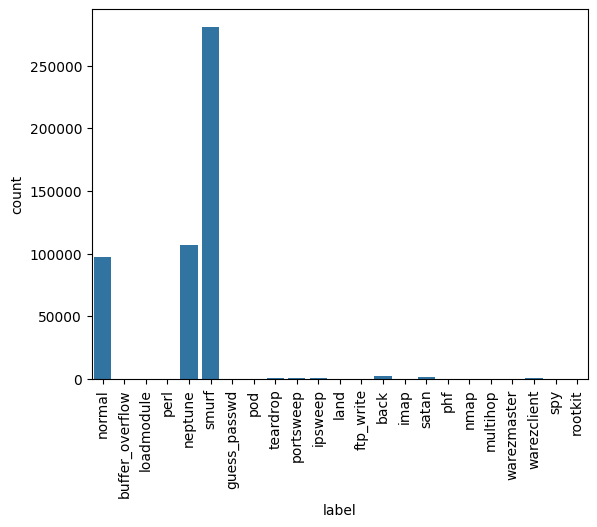

In [ ]:
ax = sns.countplot(df, x="label")
ax.tick_params(axis='x', rotation=90)

* estos predictores se pueden agrupar en dos categorías principales: conexiones normales y conexiones anómalas (ataques).

* Las conexiones anómalas se dividen en cuatro categorías de ataques diferentes.

**Categorías de Conexiones:**
1. Normal (normal): Estas son conexiones de red legítimas y no representan ningún tipo de actividad maliciosa.

2. Ataques: Los ataques en el conjunto de datos KDD Cup 1999 se clasifican en cuatro categorías principales:

 * [Denial of Service (DoS)](https://es.wikipedia.org/wiki/Ataque_de_denegaci%C3%B3n_de_servicio):  El objetivo de estos ataques es hacer que los recursos de la red o las máquinas sean inaccesibles para los usuarios legítimos mediante el envío de una gran cantidad de solicitudes maliciosas. Ejemplos incluyen:
            * back
            * land
            * neptune
            * pod
            * smurf
            * teardrop
            * etc
  *[Remote to Local (R2L)](https://www.redalyc.org/journal/3783/378365913008/html/): Un ataque R2L es cuando se envían paquetes desde una computadora remota a un usuario local con diferentes privilegios de uso para determinar la vulnerabilidad de la computadora local y colapsar los privilegios de acceso del usuario.

            * ftp_write
            * guess_passwd
            * imap
            * multihop
            * phf
            * spy
            * warezclient
            * warezmaster

  * User to Root: Un ataque U2R es cuando el atacante comienza con una cuenta de usuario normal e intenta abusar de la vulnerabilidad del sistema para obtener privilegios de súper usuario.

            * buffer_overflow
            * loadmodule
            * perl
            * rootkit

  * Probing (Probe): ataque de tipo Probe es cuando el atacante hace un escaneo de la computadora en busca de debilidades o vulnerabilidades que pudiera usar luego para comprometer el sistema.

            * ipsweep
            * nmap
            * portsweep
            * satan

<p>
    Los predictores 'protocol_type','service','flag' recibiran el tratamiento de <b>.OneHotEncoder()</b> con el costo que eso conlleva.
</p>

<p> Por otro lado 'Label' recibira el tratamiento de <b>.LabelEncoder()</b></p>

### **PCA**
si se ejecuta el notebook, ejecutar al final

esta es una seccion que surgio a ultimo momento mas concretamente a las 12:12 del dia 25/6/2024

pasada esta seccion el dataset a drede se le tranformaran algunas columnas con oneHotEncoder() y se escalaran los datos con robustScaler(), pero antes me gustaria probar cuales son los predictores mas importantes con el algoritmo PCA.

no modificara nada del tp ya realizado, solo es para ver que tanta importancia tienen todos los predictores

In [ ]:
df_PCA = df

In [ ]:
df_PCA.shape

(494020, 42)

solo se usaran las columnas numericas

In [ ]:
df_numerico = df_PCA.select_dtypes(include = 'number').columns

In [ ]:
df_numerico

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'lnum_compromised',
       'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations',
       'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

se usara standarScaler() ya que este algoritmo requiere que los datos esten normalizados.

lo datos se requieren en el siguiente formato

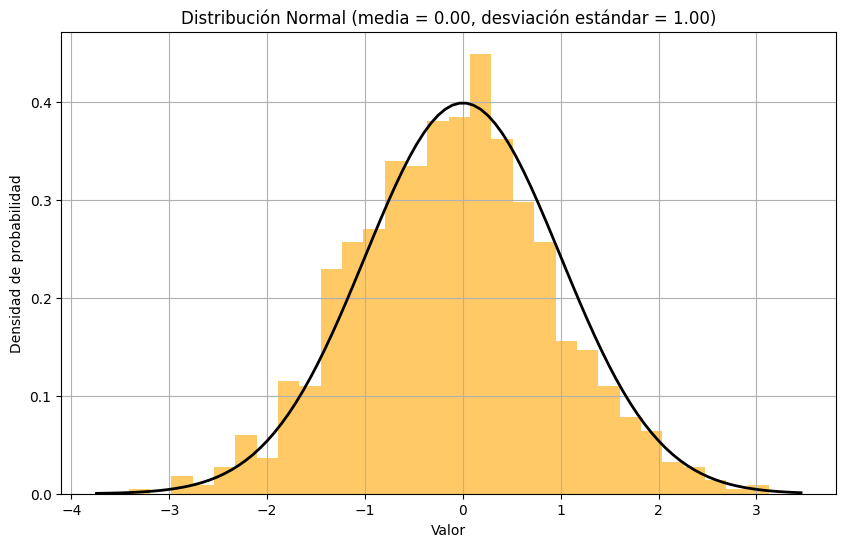

In [ ]:
mu = 0     # Media
sigma = 1  # Desviación estándar

data = np.random.normal(mu, sigma, 1000)

plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='orange')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

title = "Distribución Normal (media = {:.2f}, desviación estándar = {:.2f})".format(mu, sigma)
plt.title(title)
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
# Mostrar la gráfica
plt.show()

In [ ]:
ss = StandardScaler()

In [ ]:
df_PCA_ss = ss.fit_transform(df_PCA[df_numerico])

#### prueba a para cantidad de predictores

In [ ]:
PCA = PCA()

In [ ]:
PCA.fit(df_PCA_ss)

PCA()

In [ ]:
explained_variance = np.cumsum(PCA.explained_variance_ratio_)

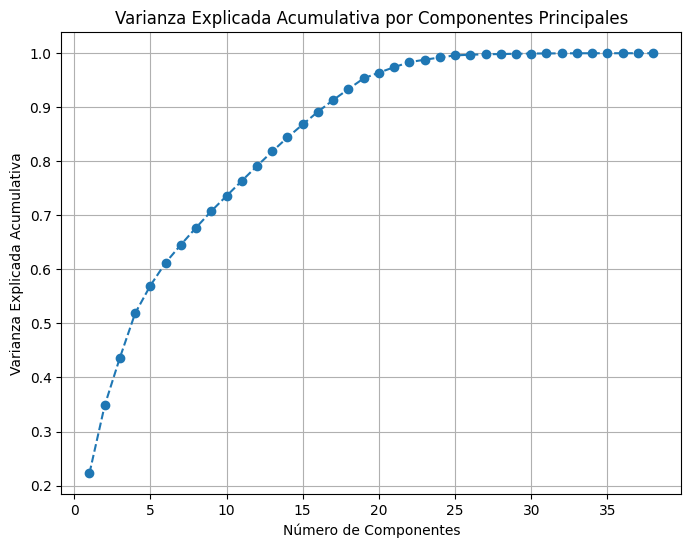

Número de componentes que explican al menos el 95% de la varianza: 19


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa por Componentes Principales')
plt.grid()
plt.show()

n_components = np.argmax(explained_variance >= 0.95) + 1
print(f'Número de componentes que explican al menos el 95% de la varianza: {n_components}')

como podemos observar solo se necesitan 19 de las 38 caracteristicas numericas.

para futuros trabajos tener en cuenta de hacer este paso extra.

In [ ]:
PCA = PCA(n_components=19, random_state= 37)

In [ ]:
PCA_ft = PCA.fit_transform(df_PCA_ss)

In [ ]:
PCA.explained_variance_ratio_.sum()

0.953496389821121

In [ ]:
df_PCA = pd.DataFrame({'PCA1' :PCA_ft[:,0],
                       'PCA2' :PCA_ft[:,1],
                       'PCA3' :PCA_ft[:,2],
                       'PCA4' :PCA_ft[:,3],
                       'PCA5' :PCA_ft[:,4],
                       'PCA6' :PCA_ft[:,5],
                       'PCA7' :PCA_ft[:,6],
                       'PCA8' :PCA_ft[:,7],
                       'PCA9' :PCA_ft[:,8],
                       'PCA10' :PCA_ft[:,9],
                       'PCA11' :PCA_ft[:,10],
                       'PCA12' :PCA_ft[:,11],
                       'PCA13' :PCA_ft[:,12],
                       'PCA14' :PCA_ft[:,13],
                       'PCA15' :PCA_ft[:,14],
                       'PCA16' :PCA_ft[:,15],
                       'PCA17' :PCA_ft[:,16],
                       'PCA18' :PCA_ft[:,17],
                       'PCA19' :PCA_ft[:,18]})

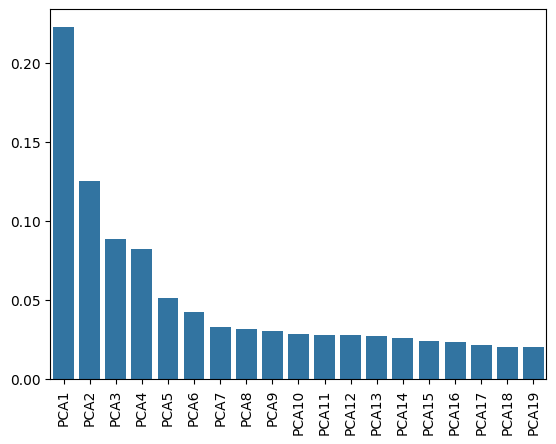

In [ ]:
ax = sns.barplot(x = ['PCA1', 'PCA2','PCA3', 'PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19'],
                      y = PCA.explained_variance_ratio_
                      )
ax.tick_params(axis='x', rotation=90)

<Axes: xlabel='PCA1', ylabel='PCA2'>

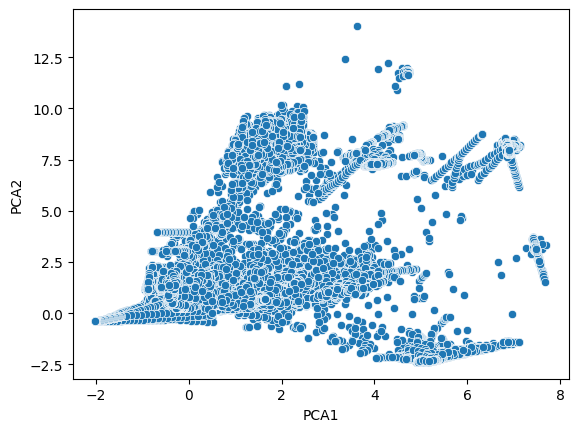

In [ ]:
sns.scatterplot(data = df_PCA, x = 'PCA1', y = 'PCA2')

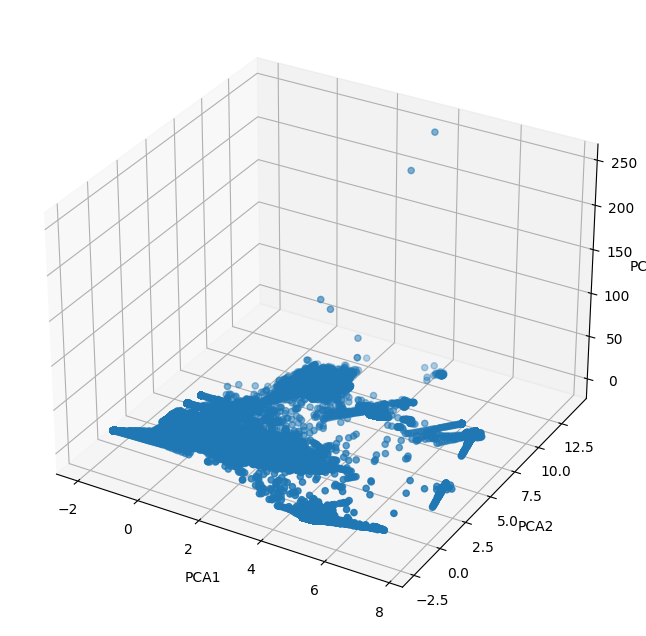

In [ ]:
fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

x = df_PCA['PCA1']
y = df_PCA['PCA2']
z = df_PCA['PCA3']

ax.scatter(x, y, z)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')


plt.show()


In [ ]:
df_PCA['PCA1'].min(), df_PCA['PCA1'].max()


(-2.0110936295464508, 7.699080161157411)

In [ ]:
df_PCA['PCA2'].min(), df_PCA['PCA2'].max()


(-2.3779388192832998, 14.026850352141162)

In [ ]:


df_PCA['PCA3'].min(), df_PCA['PCA3'].max()

(-4.8897629659621, 249.1865104361455)

### FIN PCA

## **Pre-procesado**

In [ ]:
len(df['protocol_type'].unique()),len(df['service'].unique()),len(df['flag'].unique()),len(df['label'].unique()),

(3, 66, 11, 23)

In [ ]:
#google colab a diferencia de jupyter notebook no puede generar .corr()
#df.corr()

In [ ]:
a = df[['duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','lnum_compromised','lroot_shell','lsu_attempted','lnum_root','lnum_file_creations','lnum_shells','lnum_outbound_cmds','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate']]
b = df[['protocol_type','service','flag']]
c = df[['label']]

In [ ]:
rs = RobustScaler()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False).set_output(transform = 'pandas')
le = LabelEncoder()

In [ ]:
a_ohe = ohe.fit_transform(df[['protocol_type']])
b_ohe = ohe.fit_transform(df[['service']])
c_ohe = ohe.fit_transform(df[['flag']])

<p>se seleccionan las columnas numericas para usar .robustScaler() y se las reemplaza</p>

In [ ]:
columnas_numericas = df.select_dtypes(include = 'number').columns
df[columnas_numericas] = rs.fit_transform(df[columnas_numericas])

In [ ]:
categorias = ['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap','ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap','normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan','smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster']

c_le = le.fit_transform(categorias)

<p>se se genera una lista temporal para mas tarde identificar los datos predicho por los algoritmos</p>

In [ ]:
# se podria generar una lista

for original, transformada in zip(le.classes_, range(len(le.classes_))):
    print(f'{original} -> {transformada}')

back -> 0
buffer_overflow -> 1
ftp_write -> 2
guess_passwd -> 3
imap -> 4
ipsweep -> 5
land -> 6
loadmodule -> 7
multihop -> 8
neptune -> 9
nmap -> 10
normal -> 11
perl -> 12
phf -> 13
pod -> 14
portsweep -> 15
rootkit -> 16
satan -> 17
smurf -> 18
spy -> 19
teardrop -> 20
warezclient -> 21
warezmaster -> 22


<p>se elimina las columnas comprendidas en la lista b</p>

In [ ]:
df = df.drop(columns=b)

<p>se reemplaza y tranforma la columna 'label'</p>

In [ ]:
df['label'] = le.transform(df['label'])

In [ ]:
df = pd.concat([df, a_ohe, b_ohe, c_ohe], axis = 1)

<p>como podemos observar el dataset finalizo con 119 caracteristicas</p>

In [ ]:
df.shape

(494020, 119)

<p>se pasara a dividir las caracteristicas de los tag de salida</p>

In [ ]:
X = df.drop(columns = 'label')
X_2 = df.drop(columns = 'label') # esto es por si tengo que hacer algun cambio
y = df[['label']]
y_2 = df[['label']] # esto es por si tengo que hacer algun cambio

<p>se realizara la division de los datos</p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state= 37)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.01, random_state= 37)

In [ ]:
X_train.shape,X_test.shape,X_val.shape, y_train.shape, y_test.shape, y_val.shape

((311232, 118),
 (180960, 118),
 (1828, 118),
 (311232, 1),
 (180960, 1),
 (1828, 1))

## **Creación de modelos para deteccion de ataques informaticos**

### **Red neuronal con keras y tensorflow**

<p>
    Se establecerán varios modelos de redes neuronales mediante una función que las creara, específicamente, para esa tarea ademas se hara uso de la libreria keras-tuner.
El ajuste de hiperparámetros es una parte esencial a la hora de buscar el mejor modelo de red neuronal. Pero crear muchos modelos a mano e ir alternando cosas como las capas ocultas, la cantidad de neuronas y el learning rate, es una tarea que se vuelve engorrosa.
    Para este caso, contamos con un total de 27 modelos de redes neuronales que cuentan con neuronas entre 119 y 357, learning rate de 0.1, 0.01, 0.001 y 3 capas ocultas.

</p>

**se usaran las funciones de activacion ReLU**

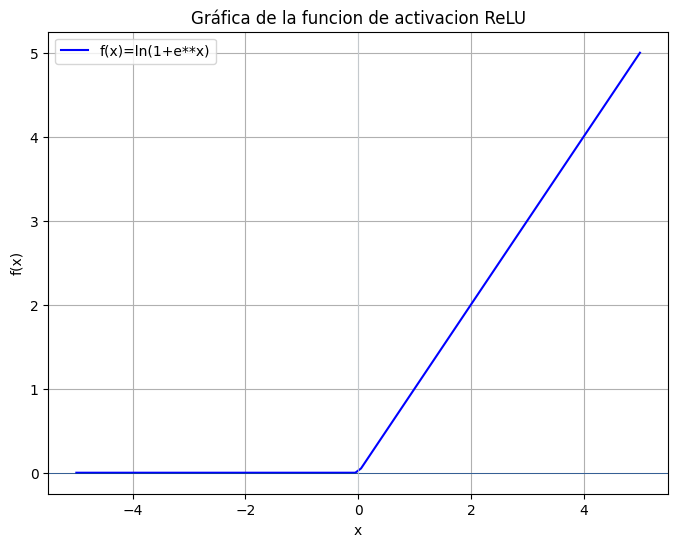

In [ ]:
def ReLU(x):
    return np.maximum(0, x)

x = np.linspace(-5, 5, 100)

y = ReLU(x)

# Paso 4: Grafica la función
plt.figure(figsize=(8, 6))  # Tamaño opcional de la figura

plt.plot(x, y, label='f(x)=ln(1+e**x)', color='blue')  # Grafica la función
plt.title('Gráfica de la funcion de activacion ReLU')  # Título del gráfico
plt.xlabel('x')  # Etiqueta del eje x
plt.ylabel('f(x)')  # Etiqueta del eje y
plt.grid(True)  # Activa la cuadrícula
plt.legend()  # Muestra la leyenda
plt.axhline(0, color='#023E8A', linewidth=0.5)  # Línea horizontal en y=0
plt.axvline(0, color='#CED4DA', linewidth=0.5)  # Línea vertical en x=0
plt.show()  # Muestra el gráfico

**y softmax**, esta ultima es la funcion de activacion mas usada para la deteccion de multiclases

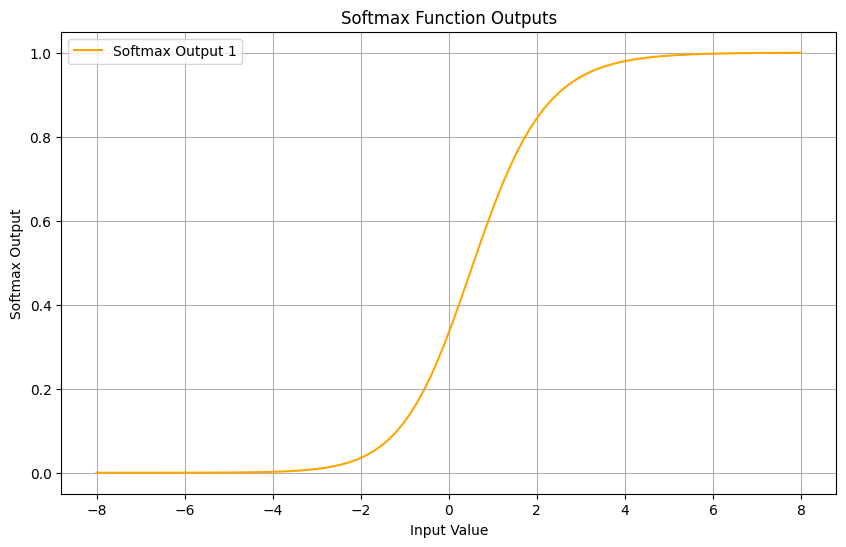

In [ ]:
# Definir la función softmax
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Crear un conjunto de datos de entrada
x = np.linspace(-8.0, 8.0, 100)

# Crear una matriz de ejemplos para aplicar softmax
inputs = np.vstack([x, x*2, x/2])

# Calcular la salida softmax para cada conjunto de datos
softmax_outputs = softmax(inputs)

# Graficar los resultados
plt.figure(figsize=(10, 6))


plt.plot(x, softmax_outputs[1], label=f'Softmax Output {1}', color = 'orange')

plt.title('Softmax Function Outputs')
plt.xlabel('Input Value')
plt.ylabel('Softmax Output')
plt.legend()
plt.grid(True)
plt.show()

la siguiente funcion se base en la funcion vista en el siguiete
[enlace](https://www.youtube.com/watch?v=EgklwkyieOY)

In [ ]:
# se debera poner esta funcion donde corresponda

def crear_modelo(hp):

    #shape = caracteristicas.shape[1]
    modelo = tf.keras.Sequential()

    modelo.add(tf.keras.layers.Input(shape=(118,)))#capa de entrada| cambiar valores respecto de caracteristicas

    for i in range(hp.Int('num_layers', min_value = 1, max_value = 3, step=1)):
        modelo.add(tf.keras.layers.Dense(units = hp.Int(f'units_{i}',
                                                        min_value = 20,
                                                        max_value = 60,
                                                        step = 5),
                                         activation ='relu')) # ReLU

        modelo.add(Dropout(rate=hp.Float('dropout',
                                         min_value=0.1,
                                         max_value=0.5,
                                         step=0.15))) # se agrega una capa dropout para
                                                     # evitar el overfiting

    modelo.add(tf.keras.layers.Dense(units=23, activation = 'softmax')) # capa de salida.

    hp_lr = hp.Choice('learning_rate', values = [0.1, 0.01, 0.001]) # por cada modelo elije un "learning_rate"

    modelo.compile(
        optimizer = tf.keras.optimizers.RMSprop(learning_rate = hp_lr),
        loss = tf.keras.losses.CategoricalCrossentropy(),
        metrics = ['accuracy'])

    return modelo

In [ ]:
# se usara to_categorical()
# esto hace un oneHotEncoder para cada caracteristica, en este caso 23

y_train_ohe = to_categorical(y_train, num_classes=23)
y_test_ohe = to_categorical(y_test, num_classes=23)
y_val_ohe = to_categorical(y_val, num_classes=23)

In [ ]:
crear_modelo(keras_tuner.HyperParameters())

#investigar optimizador bayesianOptimization

tuner = keras_tuner.BayesianOptimization(
    hypermodel = crear_modelo,
    objective = 'val_accuracy',# metrica de desempeño
    max_trials = 4,# numero total de convinaciones a probar
    directory = '1_A_tp_final',
    project_name = 'trials',
    overwrite = True # para poder sobre ecribir directorios
)

tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 60, 'step': 5, 'sampling': 'linear'}
dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.15, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001], 'ordered': True}


In [ ]:
tuner.search(X_train, y_train_ohe, epochs=3,validation_data = (X_val, y_val_ohe))

Trial 4 Complete [00h 02m 24s]
val_accuracy: 0.8123632669448853

Best val_accuracy So Far: 0.9983588457107544
Total elapsed time: 00h 06m 28s


In [ ]:
tuner.results_summary()

Results summary
Results in 1_A_tp_final/trials
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 2
units_0: 45
dropout: 0.1
learning_rate: 0.001
units_1: 30
units_2: 60
Score: 0.9983588457107544

Trial 1 summary
Hyperparameters:
num_layers: 3
units_0: 50
dropout: 0.4
learning_rate: 0.001
units_1: 20
units_2: 40
Score: 0.9857767820358276

Trial 3 summary
Hyperparameters:
num_layers: 3
units_0: 35
dropout: 0.1
learning_rate: 0.1
units_1: 45
units_2: 50
Score: 0.8123632669448853

Trial 0 summary
Hyperparameters:
num_layers: 3
units_0: 40
dropout: 0.4
learning_rate: 0.1
units_1: 20
units_2: 20
Score: 0.8107221126556396


In [ ]:
mejor_modelo = tuner.get_best_models(num_models=1)[0]

In [ ]:
mejor_modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 45)                5355      
                                                                 
 dropout (Dropout)           (None, 45)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1380      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 23)                713       
                                                                 
Total params: 7448 (29.09 KB)
Trainable params: 7448 (29.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **El mejor modelo de red neuronal**

In [ ]:
# se usara este modelo que salio en unas de los tantos entrenamiento que se hicieron


modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Input(shape=(118,)))
modelo.add(tf.keras.layers.Dense(units = 20, activation ='relu'))
modelo.add(Dropout(rate=0.1))
modelo.add(tf.keras.layers.Dense(units = 55, activation ='relu'))
modelo.add(Dropout(rate=0.1))
modelo.add(tf.keras.layers.Dense(units = 40, activation ='relu'))
modelo.add(Dropout(rate=0.1))
modelo.add(tf.keras.layers.Dense(units=23, activation = 'softmax'))

modelo.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy'])

In [ ]:
historial = modelo.fit(X_train, y_train_ohe, epochs=3, batch_size=32)# se intento con 10 epocas pero es realmente inecesario.
                                                                      # 3 son suficientes

Epoch 1/3
9726/9726 [==============================] - 27s 3ms/step - loss: 4.2720 - accuracy: 0.9824
Epoch 2/3
9726/9726 [==============================] - 23s 2ms/step - loss: 2.2212 - accuracy: 0.9915
Epoch 3/3
9726/9726 [==============================] - 29s 3ms/step - loss: 1.6408 - accuracy: 0.9934


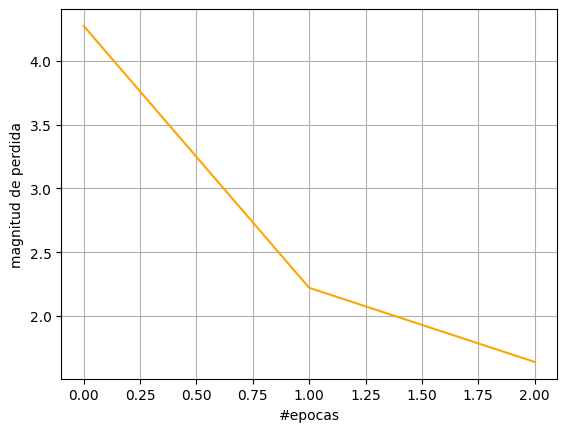

In [ ]:
plt.xlabel('#epocas')
plt.ylabel('magnitud de perdida')
plt.plot(historial.history['loss'], color = 'orange')
plt.grid(True)
plt.show()

In [ ]:
y_pred_prob = modelo.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

5655/5655 [==============================] - 9s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9966235632183909


In [ ]:
recall = recall_score(y_test, y_pred, average='macro')
print(f'recall: {recall}')

recall: 0.414803348130605


In [ ]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1-Score: {f1}')

F1-Score: 0.4169225938007171


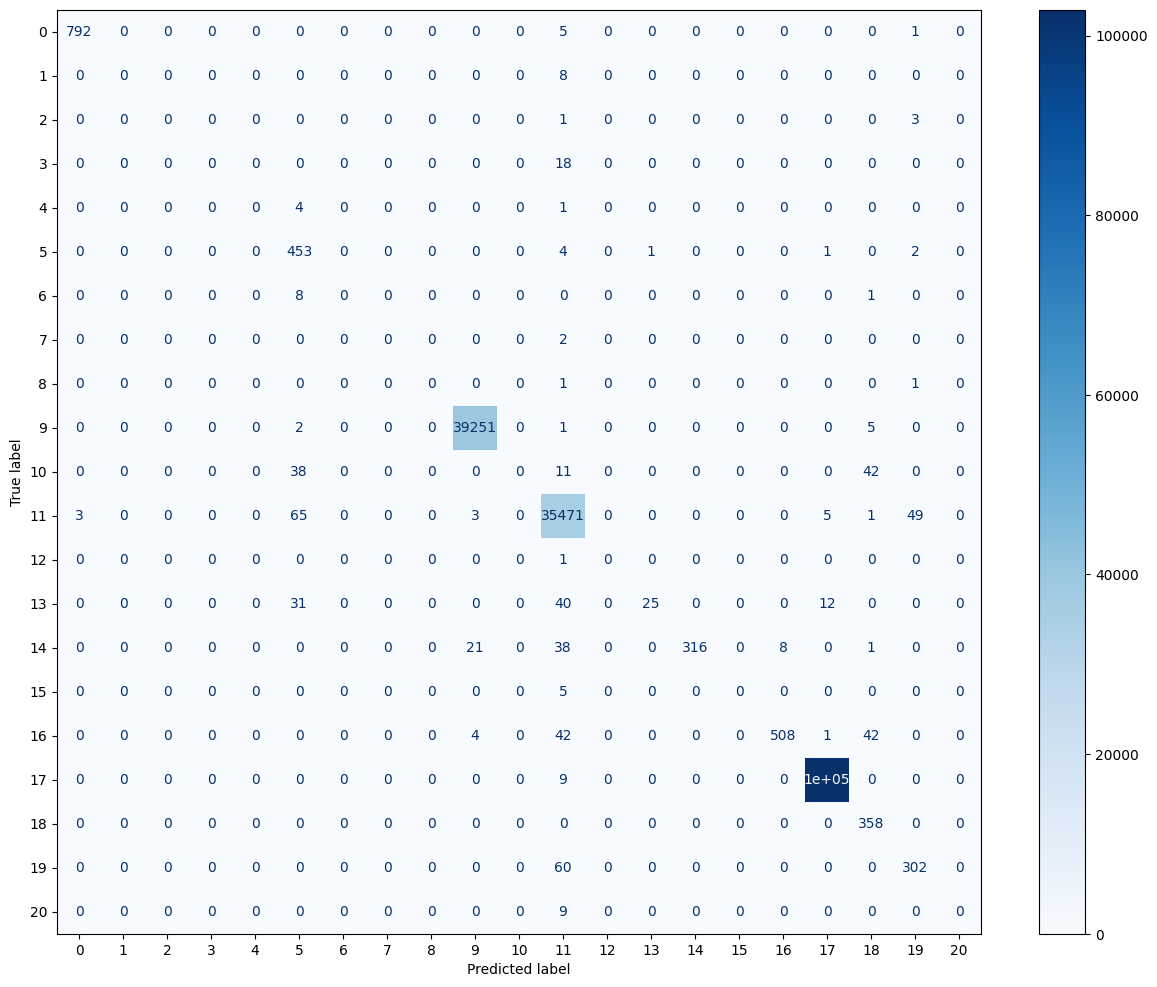

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(15, 12))  # Cambia el tamaño según tus necesidades
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

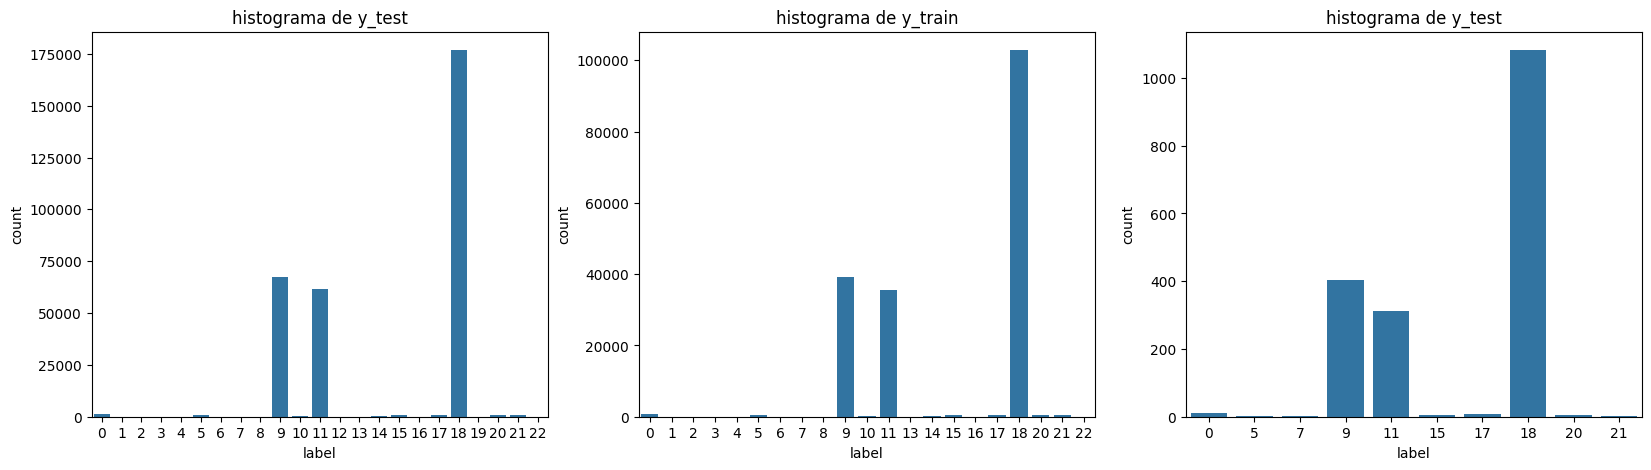

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.countplot(y_train, x="label", ax=axs[0])
axs[1].set_title('histograma de y_train')

sns.countplot(y_test, x="label", ax=axs[1])
axs[0].set_title('histograma de y_test')

sns.countplot(y_val, x="label", ax=axs[2])

axs[2].set_title('histograma de y_test')

plt.show()

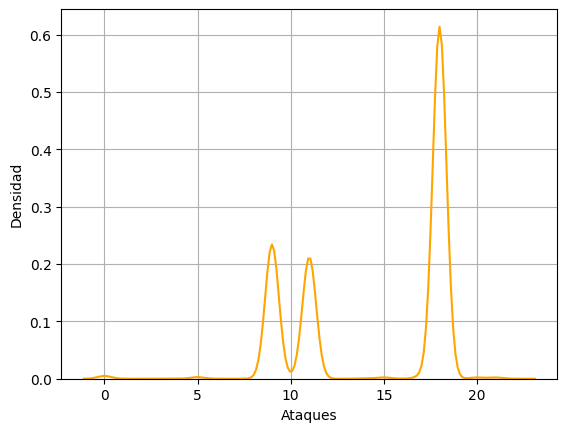

In [ ]:
sns.kdeplot(y_test,x = 'label', color = 'orange')
plt.ylabel('Densidad')
plt.xlabel('Ataques')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


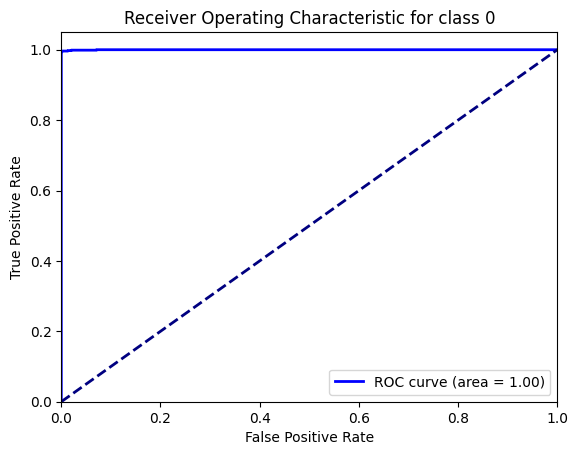

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(22):
    fpr[i], tpr[i], _ = roc_curve(y_test_ohe[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot de la curva ROC para la clase 0 (puedes hacer esto para cada clase si es necesario)
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='blue',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for class 0')
plt.legend(loc="lower right")
plt.show()

**observaciones**:

la pc con la que estoy trabajando tarda el triple en comparacion a google colab.


**informacion de la pc:**
* procesador: intel core i5 1135g7
* ram: 8gb
* grafica: intel iris Xe Graphics

### K-nearest neighbors(KNN)

<p>a partir de aca se utilizara el algoritmo knn para predecir los ataques informaticos</p>

<p>para esta parte se usara todos los las variables predictoras que estan en formato Data Frame en Array</p>

In [ ]:
y_train_2 = y_train.to_numpy().ravel() # se hace un tratamiento extra para los predictores, ademas de una copia de respaldo

In [ ]:
y_test_2 = y_test.to_numpy().ravel()

<p>se crea el objeto correspondiente</p>

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

tiempo total del algoritmo: 12min 31s segun google colab

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9985300618921309


In [ ]:
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall}')

Recall: 0.6973736055670221


In [ ]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1-Score: {f1}')

F1-Score: 0.6798040901091105


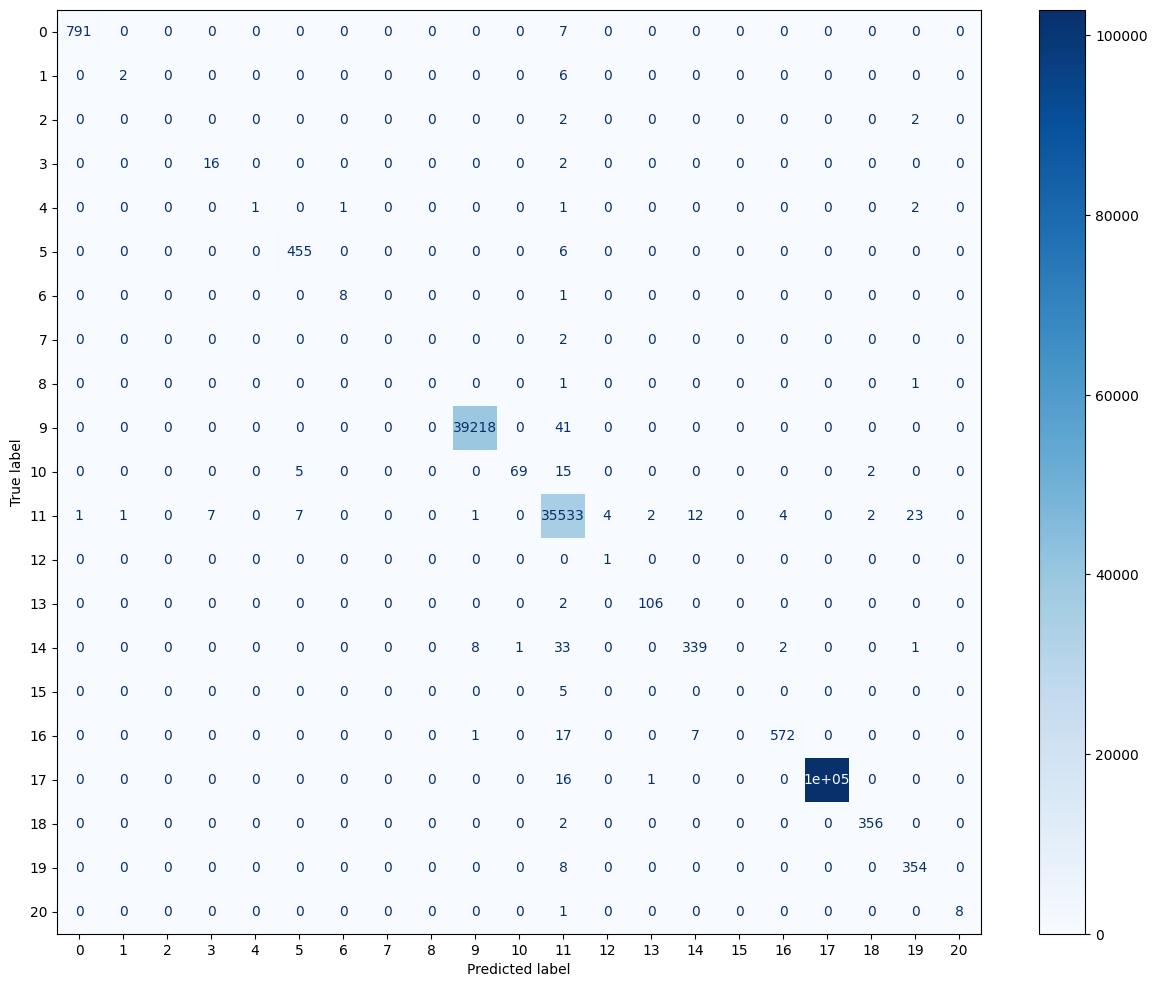

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(15, 12))  # Cambia el tamaño según tus necesidades
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print('Reporte:')
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Reporte:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       798
           1       0.67      0.25      0.36         8
           2       0.00      0.00      0.00         4
           3       0.70      0.89      0.78        18
           4       1.00      0.20      0.33         5
           5       0.97      0.99      0.98       461
           6       0.89      0.89      0.89         9
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     39259
          10       0.99      0.76      0.86        91
          11       1.00      1.00      1.00     35597
          13       0.20      1.00      0.33         1
          14       0.97      0.98      0.98       108
          15       0.95      0.88      0.91       384
          16       0.00      0.00      0.00         5
          17       0.99      0.96      0.97       597
          18      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_prob = knn.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


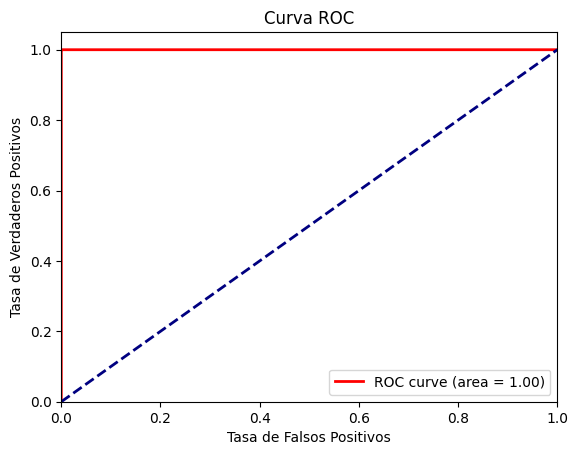

In [ ]:
n_classes = y_prob.shape[1]

# Binarizar las etiquetas
y_test_bin = label_binarize(y_test_2, classes=np.arange(n_classes))

# Inicializar las estructuras para guardar las curvas ROC y los AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot de la curva ROC para la clase 0 (puedes hacer esto para cada clase si es necesario)
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

tanto KNN como la red neuronal tiene el mismo porcentaje de acierto. si no fuera por mi sospecha de que existe overfiting tomaria la red neuronal ya que tardo menos timepo en compracion

### Support Vector machine(SVC)

a estas altura del tp voy a ir mas rapido y directo al entrenamiento

se crea el objeto correspondiente con algunos hiperparametros que seran explicados a continuacion

In [ ]:
svc = SVC(
    C=1.0,        #C: Parámetro de regularización. Cuanto más pequeño es C, más
                  #regularización se aplica, lo que significa que el modelo intenta encontrar un margen más amplio,
                  #aunque algunos puntos pueden estar mal clasificados.

    kernel='rbf', #kernel: Especifica el tipo de kernel que se va a utilizar en el algoritmo.
                  #Los valores posibles son 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

    gamma='scale',#gamma: Coeficiente para los kernels 'rbf', 'poly' y 'sigmoid'.
                  #Puede ser un valor float o 'scale' (valor predeterminado) o 'auto'.

    degree=3,     #degree: Grado del polinomio de la función kernel (solo aplicable si kernel='poly').

    probability=True,#probability: Si habilitar o no la estimación de probabilidades. Esto es más costoso computacionalmente.

    coef0=0.0,    #coef0: Término independiente en el kernel (solo aplicable si kernel='poly' o kernel='sigmoid').

    shrinking=True,#shrinking: Si usar o no la heurística de reducción.

    tol=0.001,     #tol: Tolerancia para el criterio de parada.

    cache_size=200,#cache_size: Especifica el tamaño del caché de kernel en MB
    class_weight=None, #class_weight: Peso asociado a las clases. Si se establece como 'balanced',
                       #los pesos se ajustan en proporción inversa a las frecuencias de clase.

    verbose=False,

    max_iter=-1,        #max_iter: Límite superior en el número de iteraciones dentro del solucionador; -1 para no poner límite.

    decision_function_shape='ovr', #decision_function_shape: Ya sea 'ovr' o 'ovo'
                                   #para uno contra el resto (one-vs-rest) o uno contra uno (one-vs-one).

    break_ties=False,#break_ties: Si se establece en True, se rompe un empate en la predicción utilizando la función de decisión.

    random_state=42#,#random_state: Controla la semilla del generador de números aleatorios para la inicialización de las variables.

    #nu=0.5    #nu: Un parámetro que toma valores en el rango (0, 1]. nu controla el número de errores de margen y el número de soporte vectorial.
                #En particular, nu es una aproximación superior a la fracción de errores de entrenamiento y la fracción de soporte vectorial.

)

In [ ]:
#svc.fit(X_train, y_train_2)

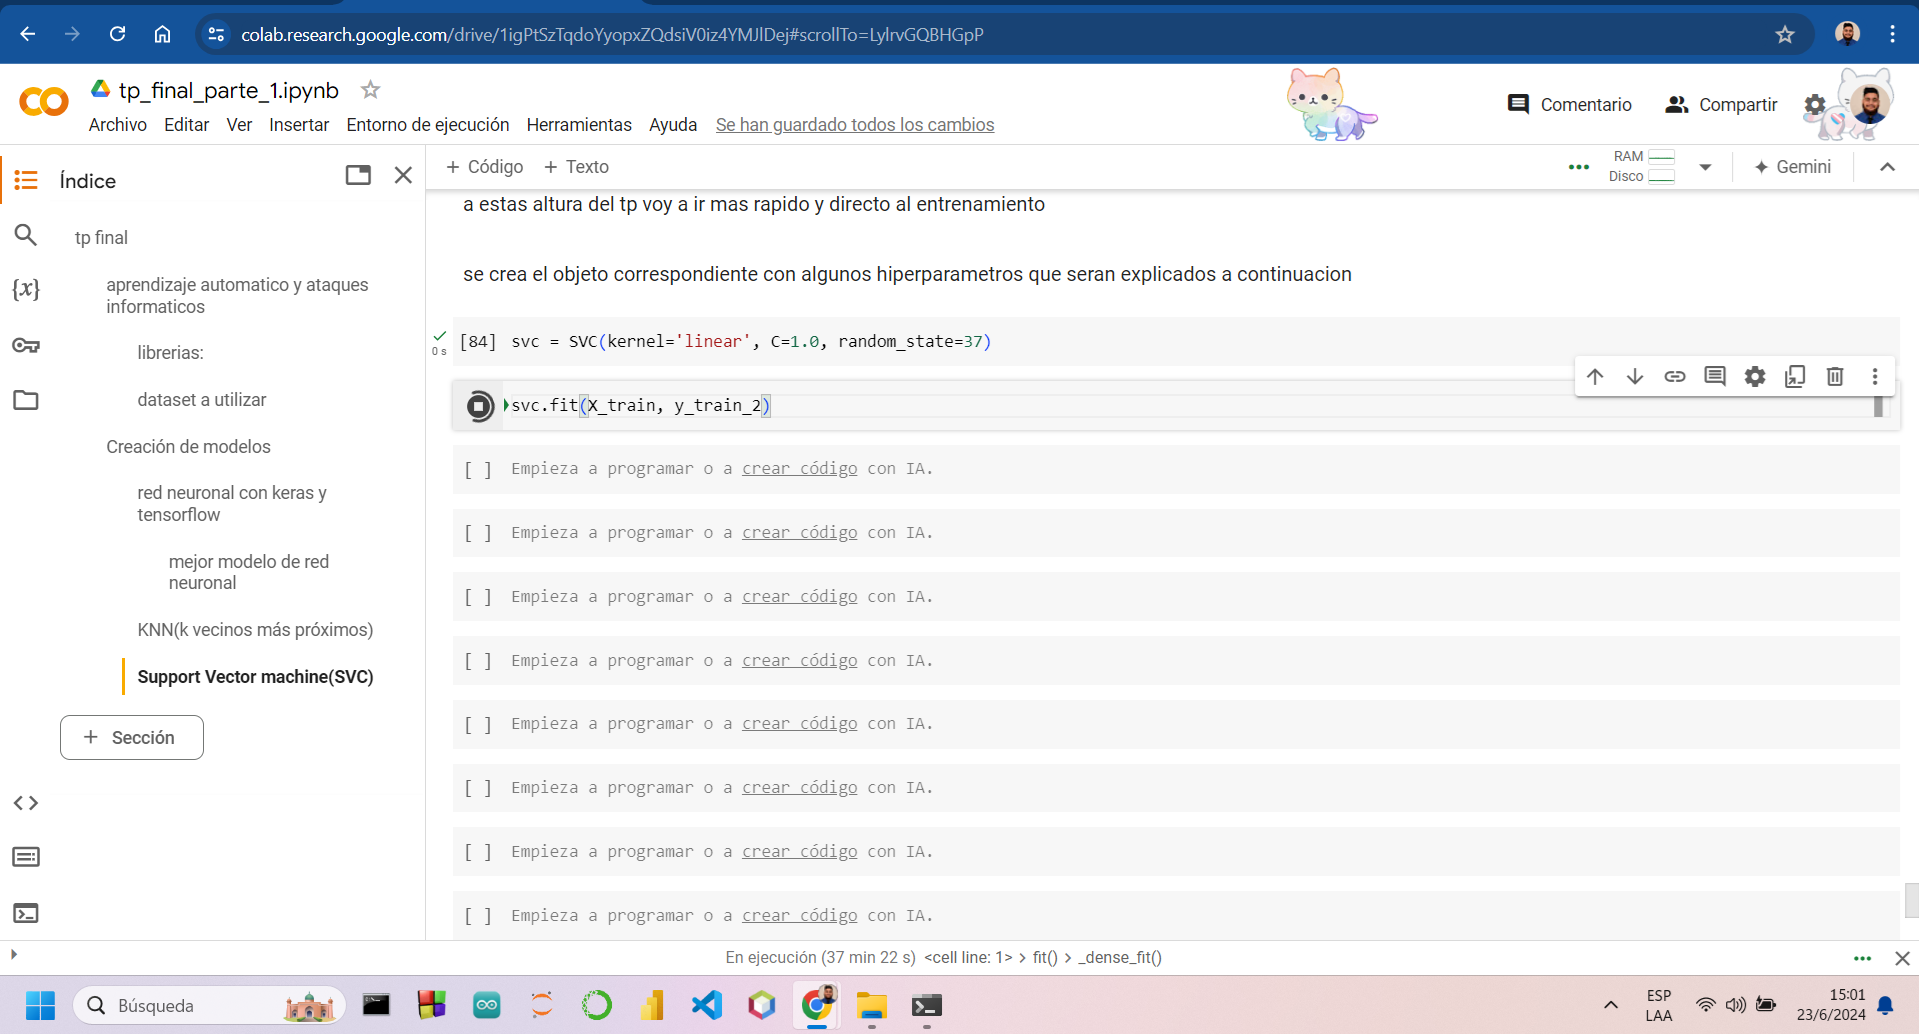

debido al tiempo que tardo el algoritmo se supende su uso

[el algoritmo genera este tipo de fronteras](https://en.wikipedia.org/wiki/Support_vector_machine#/media/File:SVM_margin.png)

**Función de Pérdida:**


La función de pérdida utilizada en SVC es la Hinge Loss, que se define como:

Hinge Loss
=
max
⁡
(
0
,
1
−
𝑦
⋅
𝑓
(
𝑥
)
)
Hinge Loss=max(0,1−y⋅f(x))

Donde:

𝑦
y es la etiqueta de clase (que toma valores +1 o -1).
𝑓
(
𝑥
)
f(x) es la función de decisión del clasificador.
Esta función de pérdida es adecuada para clasificación binaria, y busca maximizar el margen entre las clases.

**esta funcion de perdida viene incluida en la libreria**

### **Random Forest**

In [ ]:
rf_modelo = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=7,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=37
)

In [ ]:
rf_modelo.fit(X_train,y_train)

<ipython-input-73-0a8b1bab4240>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_modelo.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=200, random_state=37)

tardo **39 seg** lo cual me sorprende **MUCHO**

In [ ]:
y_pred = rf_modelo.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9992816091954023

In [ ]:
recall = recall_score(y_test, y_pred, average='macro')
print(f'Recall: {recall}')

Recall: 0.6076751472160168


In [ ]:
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1-Score: {f1}')

F1-Score: 0.6269519072507667


In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      0.38      0.55         8
           2       0.00      0.00      0.00         4
           3       1.00      1.00      1.00        18
           4       0.00      0.00      0.00         5
           5       0.95      0.98      0.97       461
           6       1.00      0.89      0.94         9
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     39259
          10       1.00      0.64      0.78        91
          11       1.00      1.00      1.00     35597
          13       0.00      0.00      0.00         1
          14       1.00      0.99      1.00       108
          15       1.00      0.99      0.99       384
          16       0.00      0.00      0.00         5
          17       1.00      0.97      0.98       597
          18       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


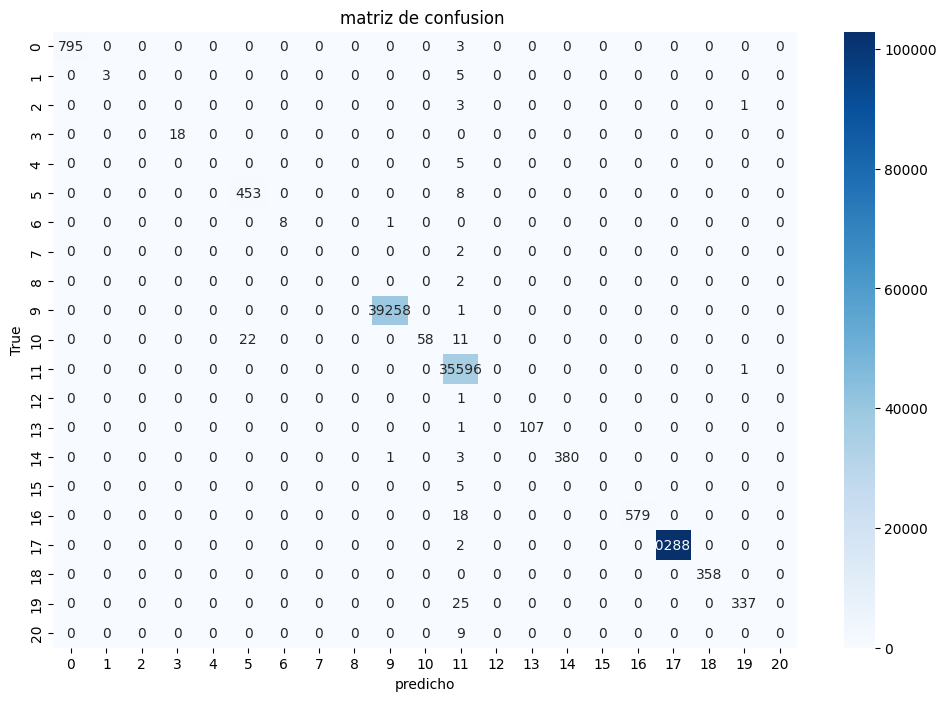

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('matriz de confusion ')
plt.xlabel('predicho')
plt.ylabel('True')
plt.show()

In [ ]:
y_prob = rf_modelo.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


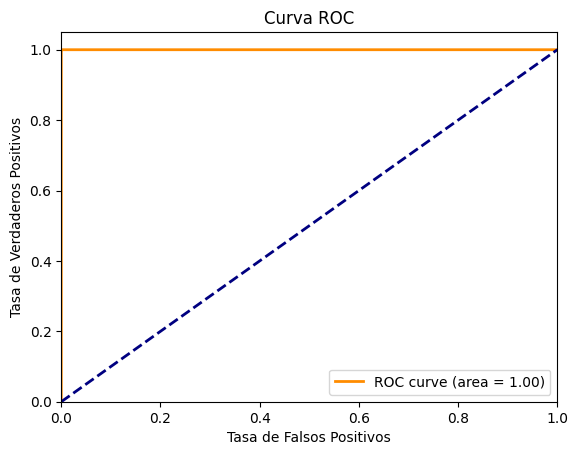

In [ ]:
# Inicializar las estructuras para guardar las curvas ROC y los AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot de la curva ROC para la clase 0 (puedes hacer esto para cada clase si es necesario)
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Entrenamiento de varios modelos

inspirado en la funcion **crear_modelo()** de la seccion **red neuronal con keras y tensoflow** me pregunte si es que podria crear muchos modelos al mismo tiempo y la respuesta es si.

### meta-learning

"meta-learning" o "apredizaje automatizado de modelos" se refiere a la aplicación de algoritmos de aprendizaje automático a datos de rendimiento de otros algoritmos de aprendizaje automático para mejorar la selección y configuración de modelos.

[más informacion sobre meta-learning](https://en.wikipedia.org/wiki/Meta-learning_(computer_science))

para esta seccion se generaran datos sinteticos mediante la funcion **generador_de_datasets()**. esto es para agilizar el proceso de entrenamiento de los multiples modelos ya que en secciones anteriores hubieron modelos como SVM, KNN y  las redes neuronales que tardaban en ser entrenados entre 10min ∼ 40min(como el caso de SVM)

In [ ]:
def generador_de_datasets(num_datasets=40, num_muestras=1000, num_caracteristicas=200):
    datasets = []
    for _ in range(num_datasets):
        X, y = make_classification(n_samples=num_muestras, n_features=num_caracteristicas, random_state=np.random.randint(10000))
        datasets.append((X, y))
    return datasets

datasets = generador_de_datasets()

In [ ]:
datasets[0]

(array([[ 0.51723176, -0.01648205, -1.30072248, ..., -2.23485716,
          2.46635468,  1.12546613],
        [-1.62427177, -0.43361386,  0.06420378, ..., -1.06933976,
          0.85129061, -1.15406492],
        [ 0.12820226,  0.11949028, -0.28716166, ...,  1.83273787,
         -0.49298636, -1.47022967],
        ...,
        [ 0.88044988,  0.84228835, -0.4351123 , ...,  0.27617319,
         -0.07890421, -0.29643556],
        [ 0.90096244, -0.33747226, -0.65621663, ..., -0.23244246,
         -0.90969297,  0.25132385],
        [ 1.04910794,  0.44295135, -1.16999605, ...,  0.83014143,
          0.82081229, -1.07427069]]),
 array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
   

los datasets sinteticos que se utiliaran tienen este formato

una vez generados los datos sinteticos, se pasara a crear un diccionario que va a contener los modelos que se utilizaran. se tomaran tres:
* Random Forest
* K-Nearest Neighbors (KNN)
* Support Vector Machines (SVM)

todo de la libreria Scikit-learn

In [ ]:
algoritmos = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [ ]:
# lista que posteriormente sera un diccionario y en donde se alojara la meta-data de los modelos
resultados = []

In [ ]:

for X, y in datasets:
    caracteristicas = X.shape[1]
    muestras = X.shape[0]
    for nombre, algoritmo in algoritmos.items():
        scores = cross_val_score(algoritmo, X, y, cv=3)
        mean_score = np.mean(scores)
        resultados.append({
            'caracteristicas': caracteristicas,
            'muestras': muestras,
            'algoritmo': nombre,
            'score': mean_score
        })

In [ ]:
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

     caracteristicas  muestras     algoritmo     score
0                200      1000  RandomForest  0.882029
1                200      1000           SVM  0.850042
2                200      1000           KNN  0.704009
3                200      1000  RandomForest  0.823015
4                200      1000           SVM  0.796033
..               ...       ...           ...       ...
115              200      1000           SVM  0.859992
116              200      1000           KNN  0.680024
117              200      1000  RandomForest  0.832012
118              200      1000           SVM  0.788028
119              200      1000           KNN  0.671995

[120 rows x 4 columns]


In [ ]:
resultados_df.shape

(120, 4)

In [ ]:
le = LabelEncoder()


In [ ]:
resultados_df['algoritmo_le'] = le.fit_transform(resultados_df['algoritmo'])

In [ ]:
meta_caracteristicas = resultados_df[['caracteristicas', 'muestras']]
meta_targets = resultados_df['algoritmo_le']


In [ ]:
X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(meta_caracteristicas, meta_targets, test_size=0.2, random_state=37)

In [ ]:
meta_model = GradientBoostingClassifier()

In [ ]:
meta_model.fit(X_meta_train, y_meta_train)

GradientBoostingClassifier()

In [ ]:
meta_model_score = meta_model.score(X_meta_test, y_meta_test)

In [ ]:
print(f'Meta-model accuracy: {meta_model_score}')

Meta-model accuracy: 0.2916666666666667


In [ ]:
y_meta_model_pred = meta_model.predict(X_meta_test)

In [ ]:
recall = recall_score(y_meta_test, y_meta_model_pred, average='macro')
print(f'Meta-model Recall: {recall}')

Recall: 0.3333333333333333


In [ ]:
f1 = f1_score(y_meta_test, y_meta_model_pred, average='macro')
print(f'Meta-model F1-Score: {f1}')

Meta-model F1-Score: 0.15053763440860216


In [ ]:
X_nuevo, y_nuevo = make_classification(n_samples=100, n_features=20, random_state=42)
nuevas_meta_caracteristicas = pd.DataFrame({
    'caracteristicas': [X_nuevo.shape[1]],
    'muestras': [X_nuevo.shape[0]]
})

# Predecir el mejor algoritmo
algoritmo_pred_le = meta_model.predict(nuevas_meta_caracteristicas)
algoritmo_pre = le.inverse_transform(algoritmo_pred_le)
print(f'Mejor algoritmo: {algoritmo_pre[0]}')



Mejor algoritmo: RandomForest


los pasos siguientes serian aplicar el modelo predicho por el meta-algoritmo

## **Aprendizaje no supervisado**

este tramo del trabajo es solo una mera curiosidad que surgio a partir de pensar como es que funcionaria el **apredizaje no supervisado** en un dataset como este, por lo tanto esta parte es obviable ya que fue pensado a ultimo momento y no estaba previsto en el trabajo.

## **¿Que es el apredizaje no supervisado?**

* El aprendizaje no supervisado es un método de aprendizaje automático (AA) donde un modelo se ajusta a las observaciones. Se distingue del aprendizaje supervisado por el hecho de que no hay un conocimiento a priori. En el aprendizaje no supervisado, un conjunto de datos de objetos de entrada es tratado. Así, el aprendizaje no supervisado típicamente trata los objetos de entrada como un conjunto de variables aleatorias, siendo construido un modelo de densidad para el conjunto de datos.

[wikipedia](https://es.wikipedia.org/wiki/Aprendizaje_no_supervisado)

se aplicaran los siguiente algoritmos:
 * PCA
 * KMeans
 * DBSCAN **no se utilizara este algoritmo por la alta demanda de ram que requiere**
 * autoencoder

In [ ]:
df_no = df

### **Modelos**

creacion de los objetos

In [ ]:
pca = PCA(n_components=30)
data_pca = pca.fit_transform(df_no)

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(data_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#dbscan = DBSCAN(eps=0.5, min_samples=5)
#dbscan_labels = dbscan.fit_predict(data_pca)

#la ejecucion se detuvo automaticamente pasado los 9s de ejecucion ya que supera los 12gb de ram que me proporciona google colab

In [ ]:
input_dim = data_pca.shape[1]
encoding_dim = 14

In [ ]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation="relu")(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_dim, activation="sigmoid")(decoded)


In [ ]:
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
autoencoder.fit(data_pca, data_pca, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)


Epoch 1/50
1544/1544 [==============================] - 6s 3ms/step - loss: 44192548.0000 - val_loss: 5421159.5000
Epoch 2/50
1544/1544 [==============================] - 4s 2ms/step - loss: 44192524.0000 - val_loss: 5421159.5000
Epoch 3/50
1544/1544 [==============================] - 4s 2ms/step - loss: 44192512.0000 - val_loss: 5421159.0000
Epoch 4/50
1544/1544 [==============================] - 6s 4ms/step - loss: 44192560.0000 - val_loss: 5421159.5000
Epoch 5/50
1544/1544 [==============================] - 4s 2ms/step - loss: 44192560.0000 - val_loss: 5421159.5000
Epoch 6/50
1544/1544 [==============================] - 4s 2ms/step - loss: 44192500.0000 - val_loss: 5421159.5000
Epoch 7/50
1544/1544 [==============================] - 5s 3ms/step - loss: 44192552.0000 - val_loss: 5421159.5000
Epoch 8/50
1544/1544 [==============================] - 4s 3ms/step - loss: 44192544.0000 - val_loss: 5421159.5000
Epoch 9/50
1544/1544 [==============================] - 4s 3ms/step - loss: 4419

In [ ]:
encoded_data = autoencoder.predict(data_pca)
mse = np.mean(np.power(data_pca - encoded_data, 2), axis=1)
anomaly_threshold = np.percentile(mse, 95)

15439/15439 [==============================] - 23s 2ms/step


In [ ]:
anomalies = mse > anomaly_threshold


In [ ]:
kmeans_labels.shape

(494020,)

In [ ]:
anomalies.shape

(494020,)

In [ ]:
# Ejemplo de salida para cada método
print("Resultados de K-means:")
print(kmeans_labels)

print("Anomalías detectadas por el autoencoder:")
print(anomalies)

Resultados de K-means:
[0 0 0 ... 0 0 0]
Anomalías detectadas por el autoencoder:
[ True False False ... False False False]


#### Evaluación en Clustering (K-means)


**definicion de chatGPT**
1. Inertia o Suma de Errores Cuadráticos (SSE):
 * La inertia o SSE es una métrica común utilizada para evaluar la calidad de los clústeres en K-means. Representa la suma de las distancias cuadradas de cada punto de datos dentro de su clúster respecto al centroide más cercano. Un valor más bajo de inertia indica clústeres más compactos y, por lo tanto, una mejor agrupación.

In [ ]:
print("Inertia (SSE) del modelo K-means:", kmeans.inertia_)

Inertia (SSE) del modelo K-means: 12344273221821.287


2. Silhouette Score:  
 * El score de silueta es otra métrica útil que proporciona una medida de cuán similar es un punto a su propio clúster en comparación con otros clústeres. Puedes calcularlo para evaluar la cohesión y la separación de los clústeres.

In [ ]:
# Esta celda no se ejecutara devido a que tardo 40min y seguia cargando. Solo esta a modo visual para ver el recorrido de trabajo que realice.

#from sklearn.metrics import silhouette_score

#silhouette_avg = silhouette_score(data_pca, kmeans_labels)
#print("Silhouette Score del modelo K-means:", silhouette_avg)

 * Un valor de silueta cercano a +1 indica que los puntos están bien agrupados, mientras que un valor cercano a -1 indica que los puntos podrían estar mal asignados.

3. Visualización y Análisis Visual:
  * Utiliza técnicas de visualización como PCA o t-SNE para representar gráficamente los datos y colorear los puntos según los clústeres asignados. Inspecciona visualmente la separación de los clústeres para verificar la calidad del clustering.

#### Evaluación en Detección de Anomalías (Autoencoders)


1. Error de Reconstrucción:
  * En el contexto de detección de anomalías con autoencoders, el error de reconstrucción (mse en el ejemplo anterior) es crucial. Puedes utilizar estadísticas resumidas como la media, la mediana y los percentiles del error para entender la distribución de los errores.

In [ ]:
mean_mse = np.mean(mse)
median_mse = np.median(mse)
percentile_95 = np.percentile(mse, 95)

print("Media del Error de Reconstrucción:", mean_mse)
print("Mediana del Error de Reconstrucción:", median_mse)
print("Percentil 95 del Error de Reconstrucción:", percentile_95)

2. Umbral de Anomalías:
  * Ajusta el umbral (anomaly_threshold en el ejemplo) basado en la distribución del error de reconstrucción para clasificar los puntos de datos como normales o anomalías. Un umbral más alto puede detectar solo las anomalías más evidentes.

3. Validación Externa (si es posible):
  * Si tienes etiquetas verdaderas o conocimiento experto sobre qué puntos de datos son realmente anomalías, puedes evaluar la precisión, el recall u otras métricas de clasificación para medir cuán bien el modelo de detección de anomalías identifica estas instancias.

#### Consideraciones Finales

* **Iteración y Ajuste**: La evaluación en aprendizaje no supervisado a menudo implica experimentación y ajuste de parámetros. Asegúrate de iterar sobre diferentes configuraciones y métodos para obtener resultados más confiables y precisos.
* **Interpretación Contextual**: Siempre considera el contexto del problema y la aplicación final de los resultados. Lo que constituye un buen rendimiento puede variar dependiendo de las necesidades específicas del negocio o la investigación.
* **Documentación y Comunicación**: Documenta tus métodos de evaluación y resultados de manera clara y comunica las limitaciones y suposiciones subyacentes de tus modelos.

Al aplicar estas técnicas y métricas, podrás obtener una mejor comprensión de la calidad y la confiabilidad de tus modelos de aprendizaje no supervisado, lo que te permitirá tomar decisiones más informadas basadas en la estructura y los patrones de tus datos.


Fin del tp de MODELIZADO DE SISTEMAS DE IA

del profesor Leonardo D'Astoli

del Instituto de Formación Técnico Superior Nro24